In [19]:
import numpy as np #numerical computations
import pandas as pd #data manipulation and analysis
import matplotlib.pyplot as plt #plotting data
from sklearn.linear_model import LinearRegression, HuberRegressor #tools for linear regression
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.model_selection import train_test_split
from mpl_toolkits import mplot3d #plotting
from sklearn.preprocessing import StandardScaler #scaling
from sklearn.preprocessing import PolynomialFeatures
%matplotlib inline #3D plotting





UsageError: unrecognized arguments: #3D plotting


In [20]:
#getting and preprocessing the data

rawdata = pd.read_csv("kc_house_data.csv")

In [21]:
rawdata.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [22]:
#removing the columns 'id', 'date', 'lat', 'long'
data = rawdata.drop(['id', 'date', 'lat', 'long'], axis=1) # axis=1: dropping info from columns
data.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'sqft_living15',
       'sqft_lot15'],
      dtype='object')

In [23]:
#Now it is the time to select specific properties as features and labels:

X = data[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'sqft_living15']]
y = data['price']

#dividing all the prices with the max price to get smaller values
y = y/y.max()

#NumPy representations of the features and labels
y = y.to_numpy()
X = X.to_numpy()



In [24]:
#an overview of the data

data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,6210.000000,871200.000000


0        221900.0
1        538000.0
2        180000.0
3        604000.0
4        510000.0
           ...   
21608    360000.0
21609    400000.0
21610    402101.0
21611    400000.0
21612    325000.0
Name: price, Length: 21613, dtype: float64


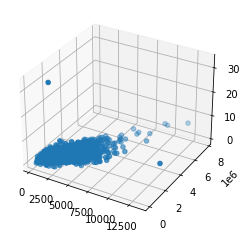

In [25]:
#examine the correaltion of different properties with price

ax = plt.axes(projection='3d')

# Data for a three-dimensional line
zline = data['bedrooms']
xline = data['sqft_living']
yline = data['price']
ax.scatter3D(xline, yline, zline, 'gray')

print(data['price'])



TypeError: 'numpy.ndarray' object is not callable

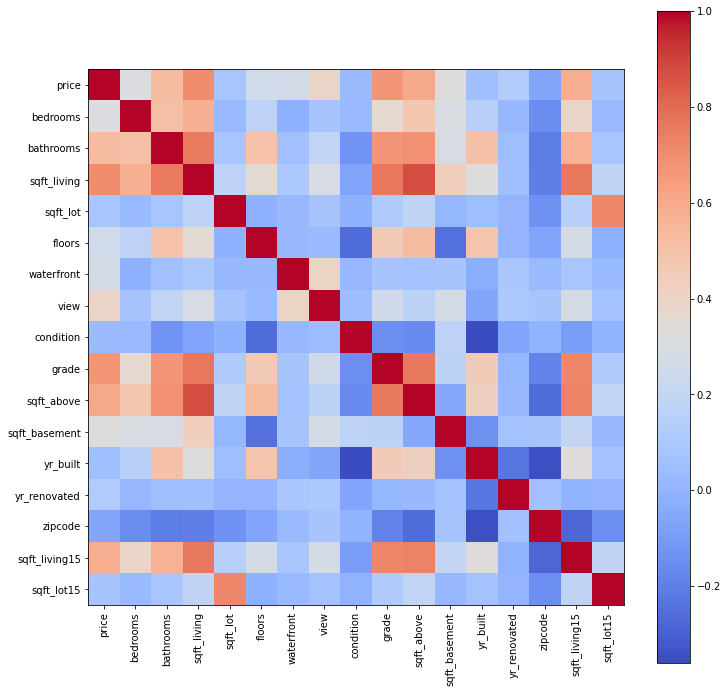

In [26]:
#Building correalation heatmap to examine the correaltion of different properties with price

plt.imshow(data.corr(), cmap='coolwarm', interpolation='none')
plt.colorbar()
plt.xticks(range(len(data.columns)), data.columns, rotation=90)
plt.yticks(range(len(data.columns)), data.columns)
plt.gcf().set_size_inches(12,12)

labels = data.corr().values
for y_ in range(labels.shape[0]):
    for x_ in range(labels.shape[1]):
        plt.text(x_, y_, "{:.2f}".format(labels(x_,y_)), ha='center', va='center', color='white')


Text(0.5, 1.0, 'bedrooms vs  price')

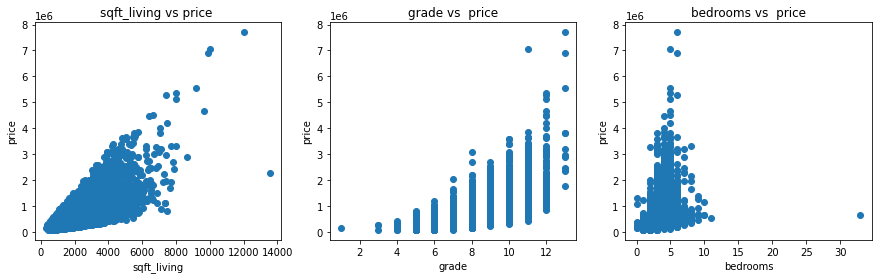

In [27]:
#We take a closer look to correlations between price and square foot living
#We also take look to correlation between price and number of bedrooms 

# Visualize data
fig, axes = plt.subplots(1, 3, figsize=(15,4))
axes[0].scatter(data['sqft_living'],data['price']);
axes[0].set_xlabel("sqft_living")
axes[0].set_ylabel("price")
axes[0].set_title("sqft_living vs price ")

axes[1].scatter(data['grade'],data['price']);
axes[1].set_xlabel("grade")
axes[1].set_ylabel("price")
axes[1].set_title("grade vs  price")

axes[2].scatter(data['bedrooms'],data['price']);
axes[2].set_xlabel("bedrooms")
axes[2].set_ylabel("price")
axes[2].set_title("bedrooms vs  price")



In [28]:
#scaling the X-values
scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)


In [29]:
#testing how model performs wih only one feature
#Linear regression with only price and sqft_living
X_ = data[['sqft_living']]
y_ = data['price']

X_ = X_.to_numpy()
y_ = y_.to_numpy()

lin_regr = LinearRegression()
lin_regr.fit(X_, y_)

y_pred_train = lin_regr.predict(X_)
tr_error = mean_squared_error(y_, y_pred_train) 
acc_train = lin_regr.score(X_, y_) 

print(y_pred_train[:10])
print(y_[:10])

#y_pred_val = lin_regr.predict(X_val)
#val_error = mean_squared_error(y_val, y_pred_val)
#acc_val = lin_regr.score(X_val, y_val) 

print("The training error:", tr_error)
print("Accuracy:", acc_train)
print("\nw1 = ", lin_regr.coef_)
print("\nw0 = ", lin_regr.intercept_)

#print("The validation error:", val_error)
#print("Validation accuracy:", acc_val)

[ 287555.06702452  677621.82640197  172499.40418656  506441.44998452
  427866.85097324 1477398.99490969  437688.67584965  253880.23887682
  455929.20776298  486797.8002317 ]
[ 221900.  538000.  180000.  604000.  510000. 1225000.  257500.  291850.
  229500.  323000.]
The training error: 68351286833.039825
Accuracy: 0.4928532179037931

w1 =  [280.6235679]

w0 =  -43580.743094473146


In [30]:
#splitting the datset into training and remaining set

X_train, X_rem, y_train, y_rem = train_test_split(X_scaled, y, test_size=0.2, random_state=41)

In [31]:
#splitting the remaining dataset into validation set and test set

X_val, X_test, y_val, y_test = train_test_split(X_rem, y_rem, test_size=0.1, random_state=41)

In [32]:
#now we have three datasets

#X_train and y_train
#X_val and y_val
#X_test and y_test

In [33]:
#first we use linear regression model

#now we fit linear regression model and predict label values based on features
#we also calculate training error

lin_regr = LinearRegression()
lin_regr.fit(X_train, y_train)

y_pred_train = lin_regr.predict(X_train)
tr_error = mean_squared_error(y_train, y_pred_train) 
acc_train = lin_regr.score(X_train, y_train) 

y_pred_val = lin_regr.predict(X_val)
val_error = mean_squared_error(y_val, y_pred_val)
acc_val = lin_regr.score(X_val, y_val) 

print("The training error:", tr_error)
print("Accuracy:", acc_train)
#print("\nw1 = ", lin_regr.coef_)
#print("\nw0 = ", lin_regr.intercept_)

print("The validation error:", val_error)
print("Validation accuracy:", acc_val)


The training error: 0.0007486762075210716
Accuracy: 0.6515992474941443
The validation error: 0.0009771946533612364
Validation accuracy: 0.657430305749561


In [34]:
#next we try polynomial regression
#this is done wih help from assigment 4.2

#define a list of values for polynomial degreees
degrees = [1,2,3,4]
    
#making lists where we can store the errors
tr_errors = []
val_errors = []

for i,degree in enumerate(degrees): #looping with different polynomial degrees
    
    #print("We are using polynomial degree", degree)
    
    lin_regr = LinearRegression(fit_intercept=False) #generating linearregression model
    poly = PolynomialFeatures(degree=degree) #generating polynomial features
    X_train_poly = poly.fit_transform(X_train) #fit and transform features
    lin_regr.fit(X_train_poly, y_train) #applying linear regression to new features
    
    y_pred_train = lin_regr.predict(X_train_poly) #predict values for training data using linear model
    tr_error = mean_squared_error(y_train, y_pred_train)
    
    X_val_poly = poly.fit_transform(X_val) #fit and transform the raw features for validation data
    y_pred_val = lin_regr.predict(X_val_poly)
    val_error = mean_squared_error(y_val, y_pred_val)
    
    #print("\nWegihts: \n",lin_regr.coef_)
    
    tr_errors.append(tr_error)
    val_errors.append(val_error)
    
    print("The training error:", tr_error)
    print("training accuracy:", acc_train)
    print("The validation error:", val_error)
    print("Validation accuracy:", acc_val)
    
    
    



The training error: 0.000748704087067833
training accuracy: 0.6515992474941443
The validation error: 0.0009783992372056987
Validation accuracy: 0.657430305749561
The training error: 0.000541190799430368
training accuracy: 0.6515992474941443
The validation error: 0.0006423009949871493
Validation accuracy: 0.657430305749561
The training error: 0.00041307201301284997
training accuracy: 0.6515992474941443
The validation error: 0.001514012304052485
Validation accuracy: 0.657430305749561
The training error: 0.00028095810734668356
training accuracy: 0.6515992474941443
The validation error: 607.8603083610866
Validation accuracy: 0.657430305749561


In [35]:
y_max = data['price'].max()

print("y max:", y_max)
print(y_pred_train[:10]*y_max)
print("Real values:", y_train[:10]*y_max)

y max: 7700000.0
[1111505.754649    279121.2696167   476200.14812765  187027.67112664
  272550.29333438  359446.0714659   327331.50890443  625807.233341
  984044.6110823   701826.4012787 ]
Real values: [1100000.  372000.  535000.  176000.  265000.  280000.  630000.  550000.
  957000.  805000.]


In [36]:
# create a table to compare training and validation errors
errors = {"poly degree":degrees,
          "linear_train_errors":tr_errors,
          "linear_val_errors":val_errors,
         }
pd.DataFrame({ key:pd.Series(value) for key, value in errors.items()})

,poly degree,linear_train_errors,linear_val_errors
0,1,0.000749,0.000978
1,2,0.000541,0.000642
2,3,0.000413,0.001514
3,4,0.000281,607.860308
